In [260]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from TSP import compute_distance_matrix, visualize
from GA import solve

In [277]:
def analyze_ga(
    csv_file: str,
    population_size: int = 100,
    generations: int = 100,
    mutation_rate: float = 0.01,
    mutation_algorithm: str = 'swap',
    crossover_algorithm: str = 'single_point',
    selection_algorithm: str = 'tournament',
    show_fitness_plot: bool = True,
    show_route_plot: bool = True
) -> dict:
    """
    Run GA on a CSV of city coordinates and display results.
    Returns a dict with best_distance, best_route, fitness_history, time_sec.
    """
    # Load locations
    df = pd.read_csv(csv_file)
    if 'lat' in df.columns and 'lon' in df.columns:
        locations = list(zip(df['lat'], df['lon']))
    else:
        arr = df.values
        locations = [(float(r[1]), float(r[2])) for r in arr[1:]]

    # Compute distance matrix
    dist_mat = compute_distance_matrix(locations)

    # Run GA
    t0 = time.time()
    best_distance, best_route, fitness_history = solve(
        dist_mat,
        population_size=population_size,
        generations=generations,
        mutation_rate=mutation_rate,
        mutation_algorithm=mutation_algorithm,
        crossover_algorithm=crossover_algorithm,
        selection_algorithm=selection_algorithm
    )
    elapsed = time.time() - t0

    # Print results
    print(f"\n--- RESULTS for {csv_file} ---")
    print(f"Best route : {best_route}")
    print(f"Total dist : {best_distance:.2f} km")
    print(f"Time elapsed: {elapsed:.2f} s")

    # Plot fitness curve
    if show_fitness_plot:
        # plt.figure(figsize=(6,4))
        # plt.plot(fitness_history, marker='o', linestyle='-')
        # plt.title(f"Fitness over generations (population_size={population_size}, generations={generations})")
        # plt.xlabel("Generation")
        # plt.ylabel("Best fitness")
        # plt.grid(True)
        # plt.show()

        plt.figure(figsize=(8, 5))
        plt.plot(fitness_history, marker=None, linestyle='-')
        plt.title('Fitness over generations')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Plot route
    # if show_route_plot:
    #     visualize(locations, [c-1 for c in best_route], title=f"Route for {csv_file}")

    # Return dict
    return {
        'best_distance':     best_distance,
        'best_route':        best_route,
        'fitness_history':   fitness_history,
        'time_sec':          elapsed
    }


MẶC ĐỊNH

SELECTION = TOURNAMENT

CROSSOVER = SINGLE POINT

MUTATION = SWAP

POPULATION SIZE = 100, GENERATIONS = 100, MUTATION RATE = 0.01

CHỌN 19 THÀNH PHỐ LÀM MỐC 
1. NHỎ HƠN 19: DỮ LIỆU KÍCH THƯỚC NHỎ (đặc điểm: hội tụ nhanh ở <20 generations)
2. LỚN HƠN 19: DỮ LIỆU KÍCH THƯỚC LỚN

TRƯỜNG HỢP 1: DỮ LIỆU KÍCH THƯỚC NHỎ

1. 13 THÀNH PHỐ


--- RESULTS for ../data/3_MekongDelta.csv ---
Best route : [1, 9, 12, 13, 10, 4, 3, 2, 5, 6, 8, 11, 7, 1]
Total dist : 668.76 km
Time elapsed: 0.06 s


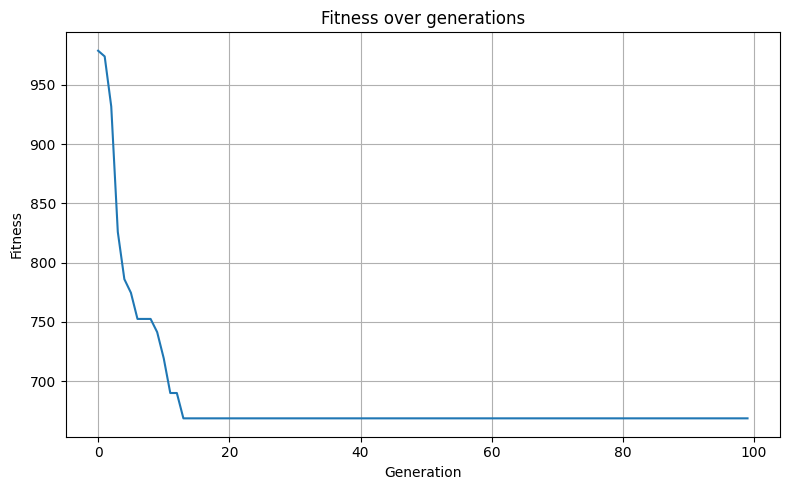

In [287]:
# Example: adjust path and parameters as needed
result1 = analyze_ga(
    "../data/3_MekongDelta.csv",
    population_size=100,
    generations=100,
    mutation_rate=0.01
)


THAY ĐỔI THAM SỐ


--- RESULTS for ../data/3_MekongDelta.csv ---
Best route : [1, 9, 11, 12, 13, 10, 4, 3, 2, 5, 6, 8, 7, 1]
Total dist : 650.14 km
Time elapsed: 0.53 s


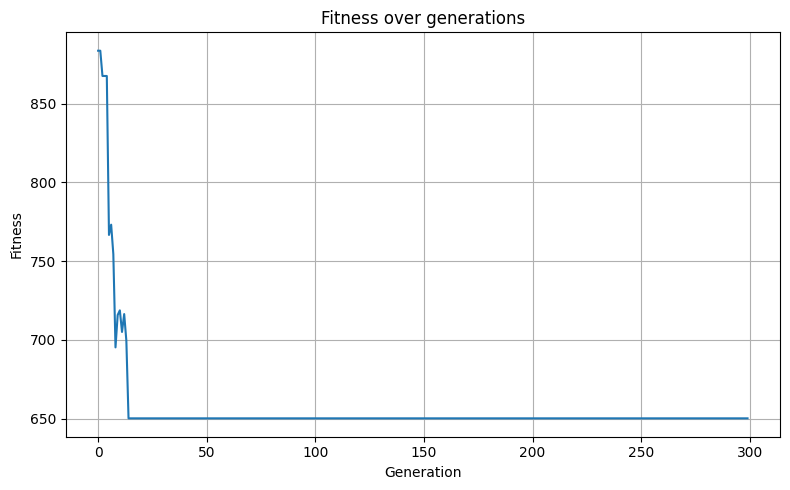

In [335]:
result2= analyze_ga(
    "../data/3_MekongDelta.csv",
    population_size=300,
    generations=300,
    mutation_rate=0.05
)

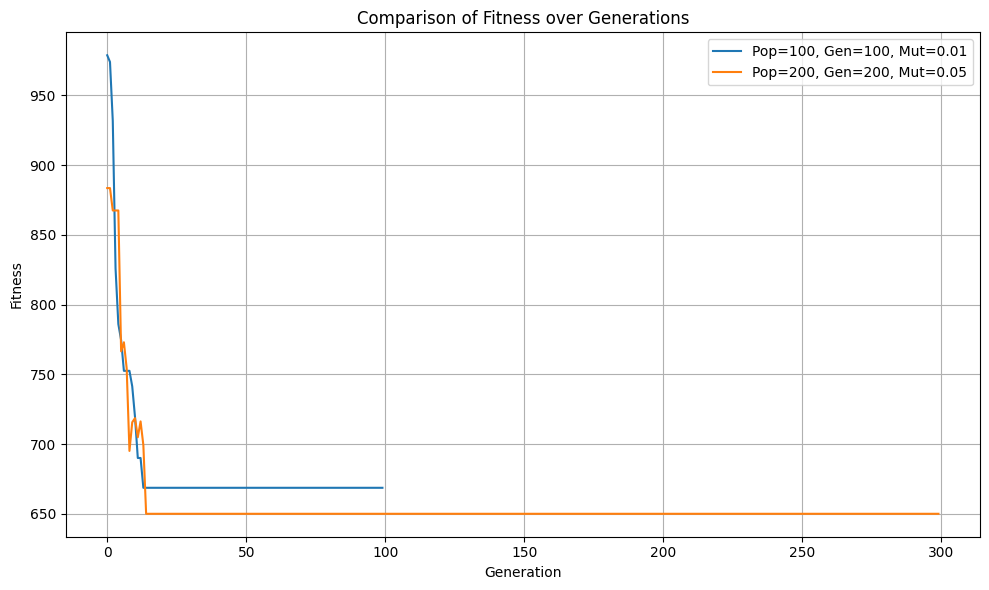

In [336]:
plt.figure(figsize=(10,6))

# Vẽ fitness của result1
plt.plot(result1['fitness_history'], label='Pop=100, Gen=100, Mut=0.01')

# Vẽ fitness của result2
plt.plot(result2['fitness_history'], label='Pop=200, Gen=200, Mut=0.05')

plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2. 19 THÀNH PHỐ


--- RESULTS for ../data/4_SouthRegion.csv ---
Best route : [1, 2, 5, 4, 18, 6, 7, 15, 17, 12, 19, 9, 8, 10, 16, 14, 13, 11, 3, 1]
Total dist : 1268.18 km
Time elapsed: 0.08 s


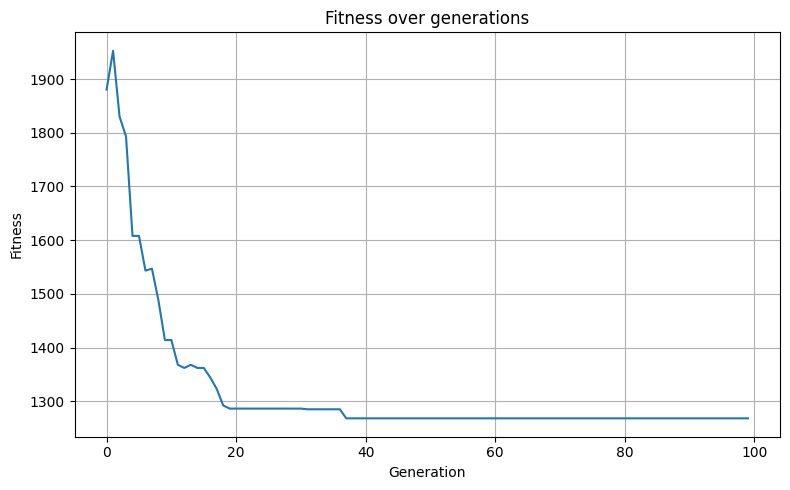

In [424]:
result3 = analyze_ga(
    "../data/4_SouthRegion.csv",
    population_size=100,
    generations=100,
    mutation_rate=0.01
)


--- RESULTS for ../data/4_SouthRegion.csv ---
Best route : [1, 3, 2, 5, 4, 18, 7, 8, 10, 9, 19, 12, 16, 15, 17, 14, 13, 11, 6, 1]
Total dist : 1126.55 km
Time elapsed: 1.30 s


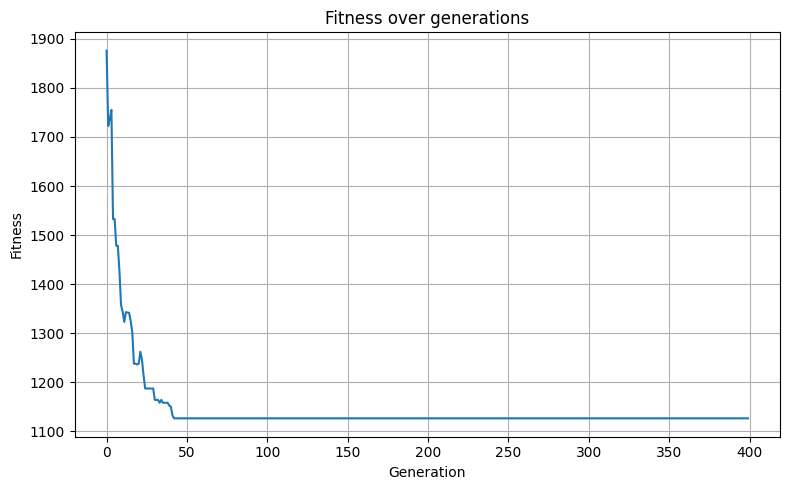

In [440]:
result4 = analyze_ga(
    "../data/4_SouthRegion.csv",
    population_size=400,
    generations=400,
    mutation_rate=0.03
)

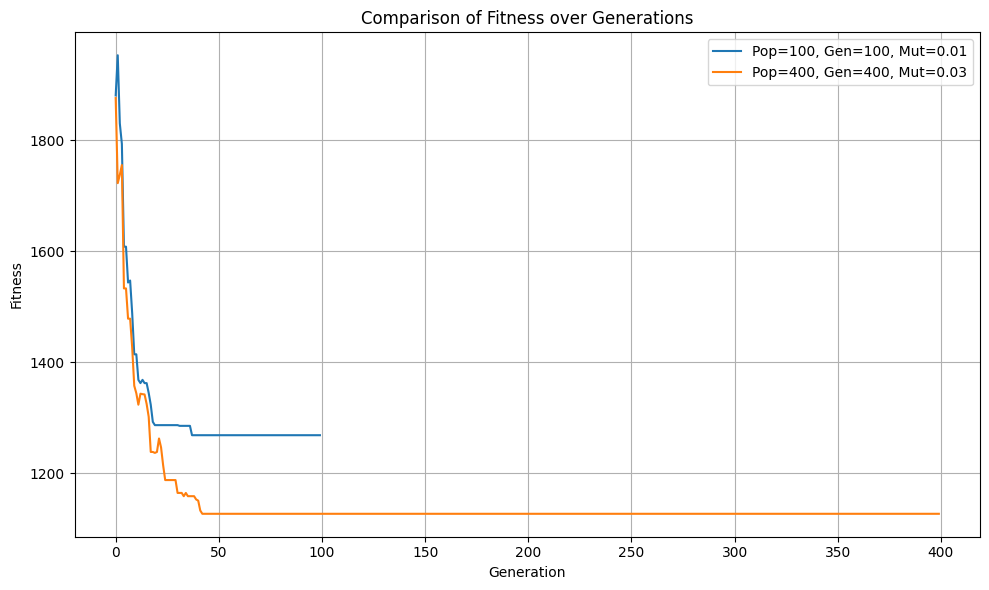

In [536]:
plt.figure(figsize=(10,6))

# Vẽ fitness của result1
plt.plot(result3['fitness_history'], label='Pop=100, Gen=100, Mut=0.01')

# Vẽ fitness của result2
plt.plot(result4['fitness_history'], label='Pop=400, Gen=400, Mut=0.03')

plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Bộ tham số mới cho ra hàm fitness tốt hơn đáng kể ở cả 2 bộ dữ liệu có kích thước nhỏ (13 thành phố và 19 thành phố)

TRƯỜNG HỢP 2: DỮ LIỆU KÍCH THƯỚC LỚN

1. 25 thành phố


--- RESULTS for ../data/6_NorthRegion.csv ---
Best route : [1, 10, 11, 13, 5, 3, 2, 4, 9, 20, 17, 23, 22, 24, 19, 8, 18, 21, 16, 6, 25, 15, 7, 14, 12, 1]
Total dist : 1814.71 km
Time elapsed: 0.11 s


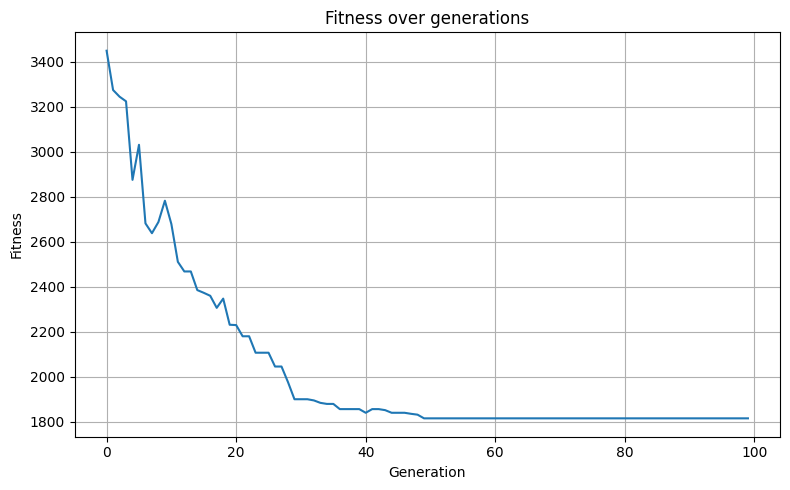

In [ ]:
result5 = analyze_ga(
    "../data/6_NorthRegion.csv",
    population_size=100,
    generations=100,
    mutation_rate=0.01
)

Đường fitness biến động nhiều với các bộ dữ liệu có kích thước. Sau nhiều lần chạy kết quả, không thể kết luận chắc chắn rằng khi tăng các tham số lên sẽ dẫn đến kết quả tốt hơn (thông thường đường fitness sau khi tăng tham số sẽ biến động nhiều hơn dẫn đến hội tụ không ổn định)


--- RESULTS for ../data/6_NorthRegion.csv ---
Best route : [1, 2, 3, 5, 25, 6, 4, 9, 20, 19, 8, 18, 16, 21, 17, 24, 22, 23, 15, 7, 12, 14, 13, 11, 10, 1]
Total dist : 1596.88 km
Time elapsed: 0.40 s


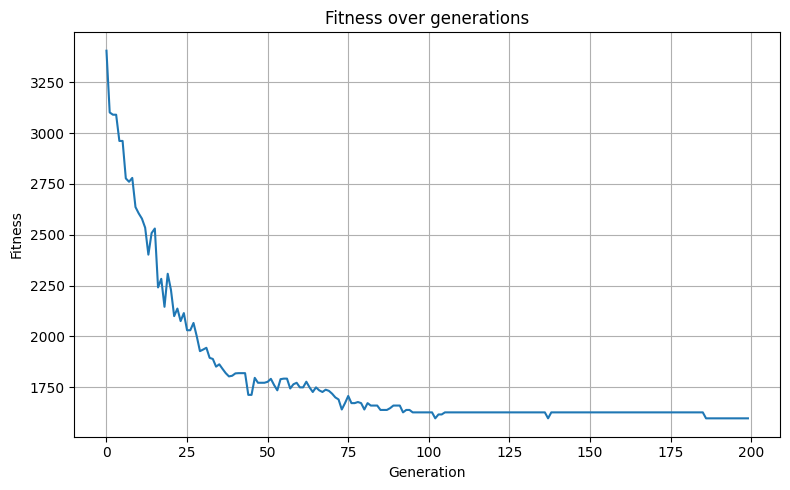

In [533]:
result6 = analyze_ga(
    "../data/6_NorthRegion.csv",
    population_size=200,
    generations=200,
    mutation_rate=0.03
)

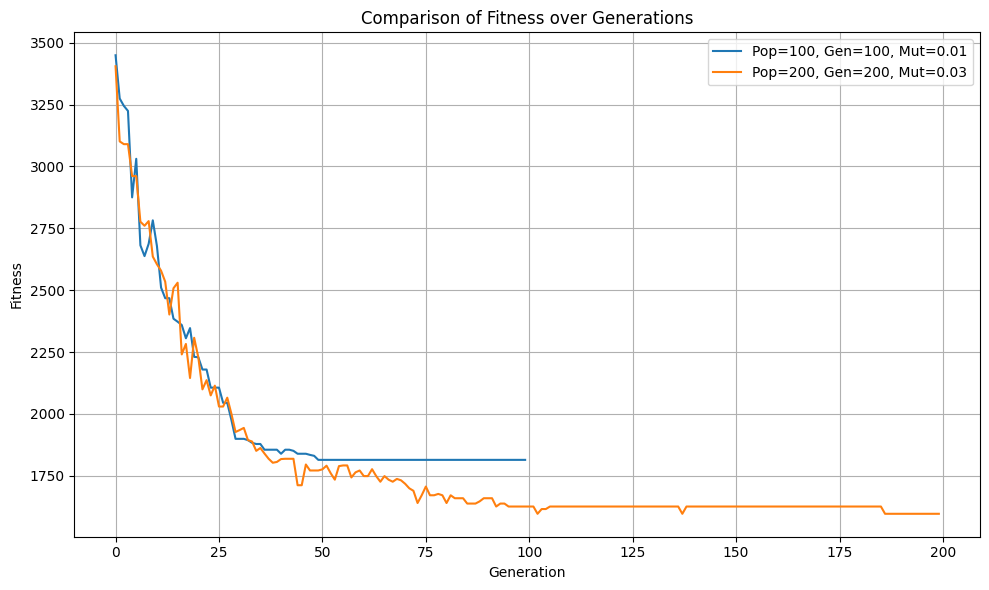

In [535]:
plt.figure(figsize=(10,6))

# Vẽ fitness của result1
plt.plot(result5['fitness_history'], label='Pop=100, Gen=100, Mut=0.01')

# Vẽ fitness của result2
plt.plot(result6['fitness_history'], label='Pop=200, Gen=200, Mut=0.03')

plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2. 38 thành phố


--- RESULTS for ../data/7_SouthandCentral.csv ---
Best route : [1, 2, 5, 7, 8, 15, 10, 11, 21, 20, 37, 25, 26, 30, 32, 38, 35, 34, 36, 33, 31, 29, 13, 18, 17, 22, 28, 27, 23, 24, 14, 6, 19, 16, 12, 9, 4, 3, 1]
Total dist : 5283.99 km
Time elapsed: 0.18 s


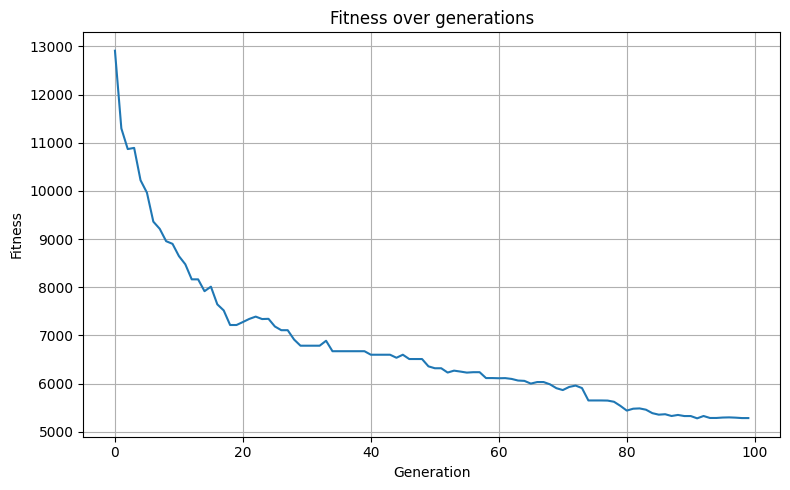

In [548]:
result7 = analyze_ga(
    "../data/7_SouthandCentral.csv",
    population_size=100,
    generations=100,
    mutation_rate=0.01
)


--- RESULTS for ../data/7_SouthandCentral.csv ---
Best route : [1, 2, 3, 4, 5, 6, 19, 7, 8, 14, 15, 9, 10, 16, 11, 12, 17, 18, 13, 24, 23, 37, 21, 25, 20, 22, 30, 28, 27, 26, 29, 35, 38, 36, 31, 32, 33, 34, 1]
Total dist : 4397.89 km
Time elapsed: 2.65 s


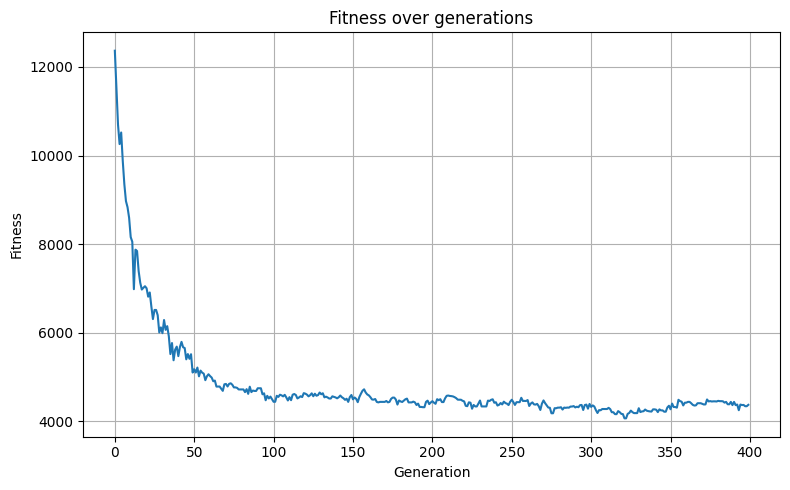

In [561]:
result8 = analyze_ga(
    "../data/7_SouthandCentral.csv",
    population_size=400,
    generations=400,
    mutation_rate=0.03
)

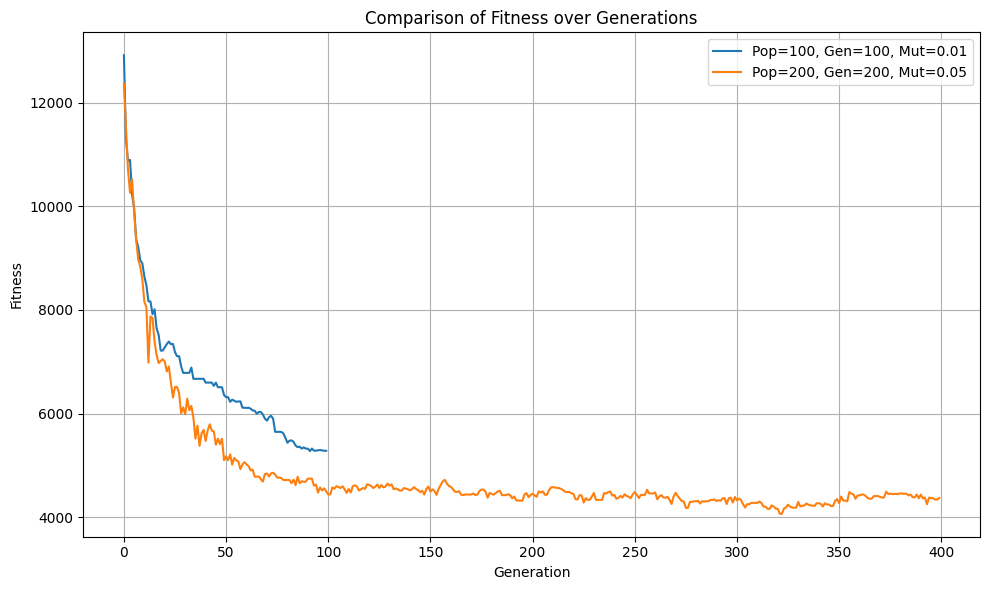

In [562]:

plt.figure(figsize=(10,6))

# Vẽ fitness của result1
plt.plot(result7['fitness_history'], label='Pop=100, Gen=100, Mut=0.01')

# Vẽ fitness của result2
plt.plot(result8['fitness_history'], label='Pop=200, Gen=200, Mut=0.05')

plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Với bộ dữ liệu kích thước lớn (25 thành phố và 38 thành phố), việc thay đổi tham số có cho ra kết quả fitness tốt hơn nhưng chạy lâu hơn và độ ổn định chưa cao

TRƯỜNG HỢP 3: THAY ĐỔI RIÊNG LẺ TỪNG YẾU TỐ
- THUẬT TOÁN
- MUTATION RATE, POPULATION SIZE, GENERATION


--- RESULTS for ../data/7_SouthandCentral.csv ---
Best route : [1, 2, 3, 4, 5, 6, 19, 8, 9, 10, 24, 11, 14, 7, 12, 16, 18, 37, 20, 13, 21, 15, 32, 27, 22, 30, 35, 28, 26, 23, 29, 38, 17, 25, 33, 36, 31, 34, 1]
Total dist : 6914.47 km
Time elapsed: 0.72 s


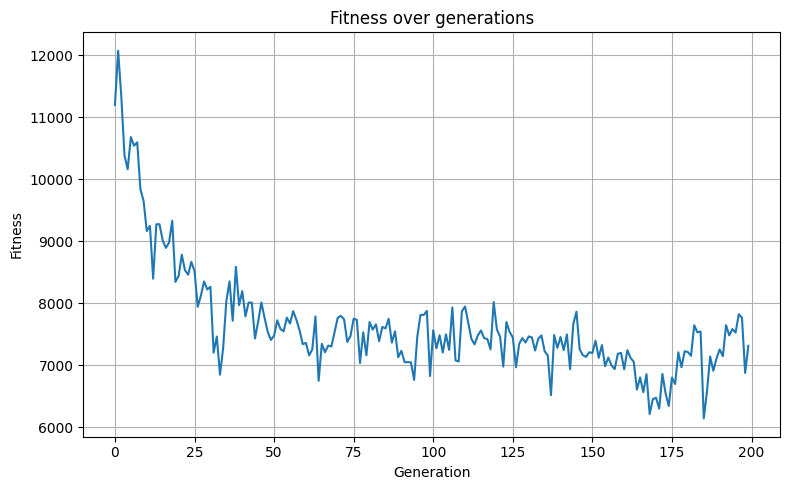


--- RESULTS for ../data/7_SouthandCentral.csv ---
Best route : [1, 2, 3, 4, 5, 6, 9, 14, 8, 24, 18, 26, 7, 10, 15, 16, 19, 11, 12, 13, 22, 36, 34, 23, 20, 17, 25, 33, 28, 30, 32, 38, 31, 21, 27, 35, 29, 37, 1]
Total dist : 7406.92 km
Time elapsed: 2.10 s


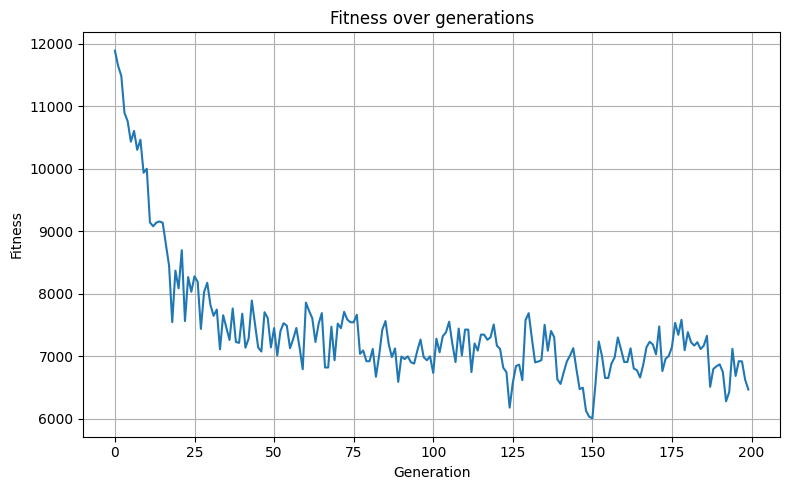


--- RESULTS for ../data/7_SouthandCentral.csv ---
Best route : [1, 2, 3, 4, 5, 15, 6, 8, 19, 16, 10, 14, 7, 31, 35, 21, 37, 12, 24, 20, 18, 9, 11, 30, 25, 28, 29, 27, 23, 26, 32, 38, 33, 34, 36, 22, 17, 13, 1]
Total dist : 7293.53 km
Time elapsed: 5.02 s


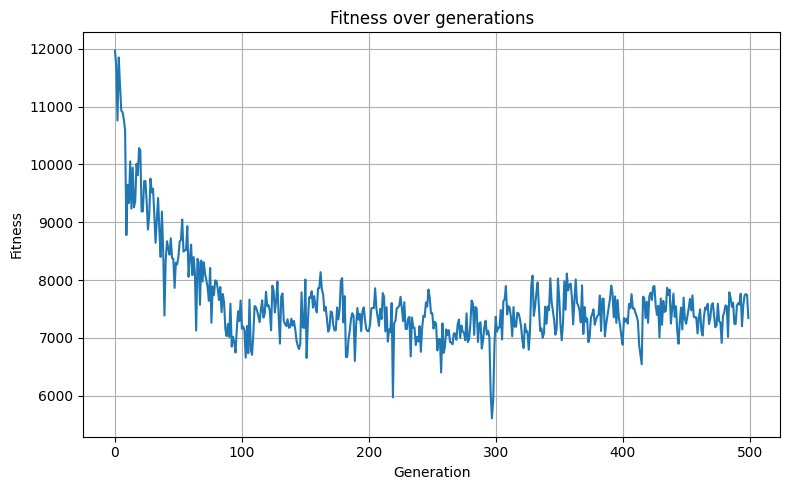


--- RESULTS for ../data/7_SouthandCentral.csv ---
Best route : [1, 3, 4, 5, 6, 19, 7, 14, 8, 9, 15, 10, 11, 12, 16, 17, 18, 13, 21, 20, 38, 31, 35, 34, 36, 33, 32, 30, 28, 29, 27, 26, 25, 37, 23, 24, 22, 2, 1]
Total dist : 3960.38 km
Time elapsed: 1.28 s


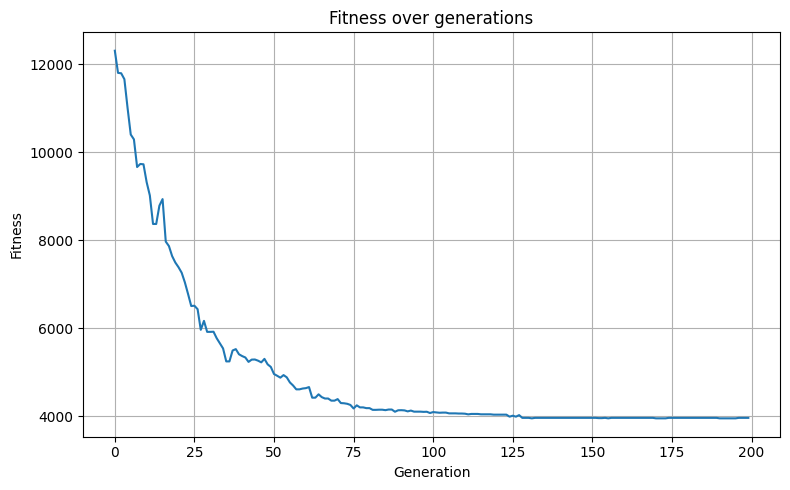

In [274]:
result13= analyze_ga(
    "../data/7_SouthandCentral.csv",
    population_size=200,
    generations=200,
    mutation_rate=0.05,
    selection_algorithm="elitism"
)

result14= analyze_ga(
    "../data/7_SouthandCentral.csv",
    population_size=500, #tăng population size
    generations=200,
    mutation_rate=0.05,
    selection_algorithm="elitism"
)

result15= analyze_ga(
    "../data/7_SouthandCentral.csv",
    population_size=200,
    generations=500,
    mutation_rate=0.05,
    selection_algorithm="elitism"
)

result16= analyze_ga(
    "../data/7_SouthandCentral.csv",
    population_size=200,
    generations=200,
    mutation_rate=0.01, #giảm mut
    selection_algorithm="elitism"
)

Chỉ khi thay đổi  mutation rate (giảm) mới đem lại kết quả tốt hơn đáng kể.